In [40]:
import numpy as np
import pandas as pd
df = pd.read_csv('project_water_quality_data.csv')
df

,Characteristic,Turbidity,pH,Sp. Conductivity,D. Solids,Nitrate Nitrogen,Phosphate (PO4),Chloride,Sulphate (SO4),T. Alkalinity,T. Hardness,CalciumHardness,Magnesium H.,D. Oxygen,B.O.D.,C.O.D.,year
0,Unit,NTU,pH Unit,�Mhos/cm.,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,NaN
1,16-03-2016,2.7,8.3,211,154,0.4,0.8,7.92,3.8,10,138,90,48,7.6,1.3,11,2016.0
2,21-04-2016,2.6,7.48,376,232,0.2,0.4,14.9,4.2,14,110,75,5,7.7,1.4,14,2016.0
3,18-05-2016,2.4,7.69,411,204,0.3,0.7,6.9,3.8,28,134,88,46,7.3,1,12,2016.0
4,14-06-2016,2,7.34,582,314,0.16,0.04,14.99,5.4,16,106,72,34,7.9,1.5,12,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,01-10-2019,3,8.34,390,374,0.34,0.112,15,10,12,164,128,36,7.2,1.5,32,2019.0
333,01-11-2019,4,8.12,302,254,0.8,0.13,12,8,38,144,92,46,7.5,1.5,16,2019.0
334,01-12-2019,2,7.6,238,192,0.35,0.012,14.48,6,25,90,70,20,7.6,1.4,12,2019.0
335,01-01-2020,2,8.19,273,217,1.3,0.112,6.93,2.87,32,76,42,34,7.7,1.6,12,2020.0


In [41]:
# Standard Values
vs = {
    "pH": 9.06,
    "Turbidity": 5,
    "temp": 25,
    "Conductivity": 1500,
    "Hardness": 500,
    "Alkalinity": 120,
    "Dissolved_oxygen": 8,
    "BOD": 4,
    "COD": 25,
    "Ammonium": 0.2,
    "Nitrate": 5,
    "Nitrite": 1,
    "Phosphate": 0.65
}

# Ideal Values
vi = {
    "pH": 7,
    "Turbidity": 0,
    "Temperature": 0,
    "Conductivity": 0,
    "Hardness": 0,
    "Alkalinity": 0,
    "Dissolved_oxygen": 14.6,
    "BOD": 0,
    "COD": 0,
    "Ammonium": 0,
    "Nitrate": 0,
    "Nitrite": 0,
    "Phosphate": 0
}

# Dropping unnecessary columns and rows
data = df.drop(['Characteristic', 'CalciumHardness', 'D. Solids', 'Chloride', 'Sulphate (SO4)', 
                'Magnesium H.'], axis=1)
data = data.drop(df.index[0])
data = data.reset_index(drop=True)
data




,Turbidity,pH,Sp. Conductivity,Nitrate Nitrogen,Phosphate (PO4),T. Alkalinity,T. Hardness,D. Oxygen,B.O.D.,C.O.D.,year
0,2.7,8.3,211,0.4,0.8,10,138,7.6,1.3,11,2016.0
1,2.6,7.48,376,0.2,0.4,14,110,7.7,1.4,14,2016.0
2,2.4,7.69,411,0.3,0.7,28,134,7.3,1,12,2016.0
3,2,7.34,582,0.16,0.04,16,106,7.9,1.5,12,2016.0
4,1.3,7.28,368,0.4,0.5,8,138,7.4,1.5,9,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
331,3,8.34,390,0.34,0.112,12,164,7.2,1.5,32,2019.0
332,4,8.12,302,0.8,0.13,38,144,7.5,1.5,16,2019.0
333,2,7.6,238,0.35,0.012,25,90,7.6,1.4,12,2019.0
334,2,8.19,273,1.3,0.112,32,76,7.7,1.6,12,2020.0


In [42]:
# Renaming columns
data = data.rename(columns={'Sp. Conductivity':'Conductivity', 'Nitrate Nitrogen':'Nitrate', 
                            'Phosphate (PO4)':'Phosphate', 'T. Alkalinity':'Alkalinity', 
                            'T. Hardness':'Hardness', 'D. Oxygen':'Dissolved_oxygen', 
                            'B.O.D.':'BOD', 'C.O.D.':'COD', 'year':'year'})
data

,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,year
0,2.7,8.3,211,0.4,0.8,10,138,7.6,1.3,11,2016.0
1,2.6,7.48,376,0.2,0.4,14,110,7.7,1.4,14,2016.0
2,2.4,7.69,411,0.3,0.7,28,134,7.3,1,12,2016.0
3,2,7.34,582,0.16,0.04,16,106,7.9,1.5,12,2016.0
4,1.3,7.28,368,0.4,0.5,8,138,7.4,1.5,9,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
331,3,8.34,390,0.34,0.112,12,164,7.2,1.5,32,2019.0
332,4,8.12,302,0.8,0.13,38,144,7.5,1.5,16,2019.0
333,2,7.6,238,0.35,0.012,25,90,7.6,1.4,12,2019.0
334,2,8.19,273,1.3,0.112,32,76,7.7,1.6,12,2020.0


In [43]:
# Changing data types from objects to numbers
data['Turbidity'] = pd.to_numeric(data['Turbidity'],errors='coerce')
data['pH'] = pd.to_numeric(data['pH'],errors='coerce')
data['Conductivity'] = pd.to_numeric(data['Conductivity'],errors='coerce')
data['Nitrate'] = pd.to_numeric(data['Nitrate'],errors='coerce')
data['Phosphate'] = pd.to_numeric(data['Phosphate'],errors='coerce')
data['Alkalinity'] = pd.to_numeric(data['Alkalinity'],errors='coerce')
data['Hardness'] = pd.to_numeric(data['Hardness'],errors='coerce')
data['Dissolved_oxygen'] = pd.to_numeric(data['Dissolved_oxygen'],errors='coerce')
data['BOD'] = pd.to_numeric(data['BOD'],errors='coerce')
data['COD'] = pd.to_numeric(data['COD'],errors='coerce')
data['year'] = pd.to_numeric(data['year'],errors='coerce')

data

,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,year
0,2.7,8.30,211.0,0.40,0.800,10,138,7.6,1.3,11.0,2016.0
1,2.6,7.48,376.0,0.20,0.400,14,110,7.7,1.4,14.0,2016.0
2,2.4,7.69,411.0,0.30,0.700,28,134,7.3,1.0,12.0,2016.0
3,2.0,7.34,582.0,0.16,0.040,16,106,7.9,1.5,12.0,2016.0
4,1.3,7.28,368.0,0.40,0.500,8,138,7.4,1.5,9.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
331,3.0,8.34,390.0,0.34,0.112,12,164,7.2,1.5,32.0,2019.0
332,4.0,8.12,302.0,0.80,0.130,38,144,7.5,1.5,16.0,2019.0
333,2.0,7.60,238.0,0.35,0.012,25,90,7.6,1.4,12.0,2019.0
334,2.0,8.19,273.0,1.30,0.112,32,76,7.7,1.6,12.0,2020.0


In [44]:
data.iloc[0, ]

Turbidity              2.7
pH                     8.3
Conductivity         211.0
Nitrate                0.4
Phosphate              0.8
Alkalinity            10.0
Hardness             138.0
Dissolved_oxygen       7.6
BOD                    1.3
COD                   11.0
year                2016.0
Name: 0, dtype: float64

In [45]:
data.columns

Index(['Turbidity', 'pH', 'Conductivity', 'Nitrate', 'Phosphate', 'Alkalinity',
       'Hardness', 'Dissolved_oxygen', 'BOD', 'COD', 'year'],
      dtype='object')

In [46]:
def calculate_wqi(vs, vi, data, num):
    k = 0
    temp = 0
    unit_weight = {}
    quality_rating = {}
    sum_unit_weight = 0
    prod_sum_wi_qi = 0
    wqi = 0
    
    # Calculating k value
    for i in data.columns :#not in (ýear):
        if(i != 'year'):
            k += (vs[i]**-1)
    k = (k**-1)
    
    # Calculating unit weight and storing in unit_weight
    for i in data.columns:
        if(i != 'year'):
            temp = (k/vs[i])
            unit_weight[i] = round(temp, 6);
    
    # Calculating quality rating and storing in quality_rating
    for i in data.columns:
        if(i != 'year'):
            temp = (data[i][num] - vi[i])/(vs[i] - vi[i])*100
            temp = round(temp, 2);
            quality_rating[i] = temp

    # Calculating summation of unit weight and storing it in sum_unit_weight
    # Calculating summation of product of unit weight and quality rating and storing it in 
    # prod_sum_wi_qi
    for i in data.columns:
        if(i != 'year'):
            sum_unit_weight += unit_weight[i]
            prod_sum_wi_qi += (quality_rating[i] * unit_weight[i])
    wqi = prod_sum_wi_qi/sum_unit_weight
    wqi = round(wqi, 2)
    return wqi

In [47]:
for i in data.columns:
    if(i != 'year'):
        print(i)

Turbidity
pH
Conductivity
Nitrate
Phosphate
Alkalinity
Hardness
Dissolved_oxygen
BOD
COD


In [48]:
print(calculate_wqi(vs, vi, data, 0))

93.74


In [49]:
print(calculate_wqi(vs, vi, data, 1))

53.61


In [50]:
wqilist = []
for i in range(0,335):
    #print(calculate_wqi(vs, vi, data, i))
    wqilist.append(calculate_wqi(vs, vi, data, i))
print(wqilist)
#    

[93.74, 53.61, 81.8, 17.81, 61.1, 69.71, 17.61, 72.15, 17.64, 79.78, 21.46, 63.43, 93.74, 14.83, 92.48, 31.47, 21.57, 92.39, 80.59, 52.8, 80.27, 30.54, 17.09, 18.4, 28.33, 27.08, 74.61, 34.28, nan, nan, 34.86, 29.98, 32.14, 37.25, 17.7, 31.16, 34.54, 31.53, nan, 31.03, 25.33, nan, 30.84, 31.97, 34.14, 31.83, 82.83, 29.88, 83.77, 63.71, 72.34, 20.73, 69.53, 31.44, 20.25, 61.93, 92.51, 39.01, 73.27, nan, 83.77, 33.65, 112.72, 14.73, 519.25, 210.67, 33.36, 61.2, 35.15, 29.98, 63.26, 32.71, 23.36, 23.55, 89.47, 54.19, 513.98, 315.94, 34.23, 36.33, 34.75, 68.68, 18.45, 32.75, 28.03, 33.27, 86.02, 32.88, 349.27, nan, 31.36, 26.82, 33.13, 33.74, 86.31, 60.97, 74.23, 62.88, 90.28, 18.88, 129.08, 55.57, 92.27, 91.01, 43.85, 32.6, 76.08, 16.39, 74.23, 750.47, 91.62, 34.24, 23.22, 114.59, 74.97, 80.65, 72.65, 24.98, 71.06, 32.71, 37.09, 27.24, 90.43, 35.42, 30.67, 209.12, 34.3, 38.18, 52.21, 35.7, 22.03, 33.82, 29.01, 32.17, 91.51, 30.84, 27.34, 30.92, 43.29, 35.02, 35.15, 35.71, 18.47, 15.72, 93

In [51]:
df2 = {'WQI_def' : wqilist}
df = pd.DataFrame(df2)
print(df)

     WQI_def
0      93.74
1      53.61
2      81.80
3      17.81
4      61.10
..       ...
330    31.38
331    30.60
332    33.01
333    16.00
334    28.83

[335 rows x 1 columns]


In [52]:
final_df = data.join(df)
print(final_df)

     Turbidity    pH  Conductivity  Nitrate  Phosphate  Alkalinity  Hardness  \
0          2.7  8.30         211.0     0.40      0.800          10       138   
1          2.6  7.48         376.0     0.20      0.400          14       110   
2          2.4  7.69         411.0     0.30      0.700          28       134   
3          2.0  7.34         582.0     0.16      0.040          16       106   
4          1.3  7.28         368.0     0.40      0.500           8       138   
..         ...   ...           ...      ...        ...         ...       ...   
331        3.0  8.34         390.0     0.34      0.112          12       164   
332        4.0  8.12         302.0     0.80      0.130          38       144   
333        2.0  7.60         238.0     0.35      0.012          25        90   
334        2.0  8.19         273.0     1.30      0.112          32        76   
335        2.0  7.30         223.0     1.14      0.160          16       188   

     Dissolved_oxygen  BOD   COD    yea

In [53]:
final_df

,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,year,WQI_def
0,2.7,8.30,211.0,0.40,0.800,10,138,7.6,1.3,11.0,2016.0,93.74
1,2.6,7.48,376.0,0.20,0.400,14,110,7.7,1.4,14.0,2016.0,53.61
2,2.4,7.69,411.0,0.30,0.700,28,134,7.3,1.0,12.0,2016.0,81.80
3,2.0,7.34,582.0,0.16,0.040,16,106,7.9,1.5,12.0,2016.0,17.81
4,1.3,7.28,368.0,0.40,0.500,8,138,7.4,1.5,9.0,2016.0,61.10
...,...,...,...,...,...,...,...,...,...,...,...,...
331,3.0,8.34,390.0,0.34,0.112,12,164,7.2,1.5,32.0,2019.0,30.60
332,4.0,8.12,302.0,0.80,0.130,38,144,7.5,1.5,16.0,2019.0,33.01
333,2.0,7.60,238.0,0.35,0.012,25,90,7.6,1.4,12.0,2019.0,16.00
334,2.0,8.19,273.0,1.30,0.112,32,76,7.7,1.6,12.0,2020.0,28.83


In [59]:
final_df.head()

,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,year,WQI_def
0,2.7,8.30,211.0,0.40,0.80,10,138,7.6,1.3,11.0,2016.0,93.74
1,2.6,7.48,376.0,0.20,0.40,14,110,7.7,1.4,14.0,2016.0,53.61
2,2.4,7.69,411.0,0.30,0.70,28,134,7.3,1.0,12.0,2016.0,81.80
3,2.0,7.34,582.0,0.16,0.04,16,106,7.9,1.5,12.0,2016.0,17.81
4,1.3,7.28,368.0,0.40,0.50,8,138,7.4,1.5,9.0,2016.0,61.10


In [60]:
import matplotlib.pyplot as plt

In [ ]:
#calculation overall wqi for each year
ag=final_df.groupby('year')['WQI_def'].mean()
ag

In [62]:
final_df=ag.reset_index(level=0,inplace=False)
final_df

NameError: name 'ag' is not defined

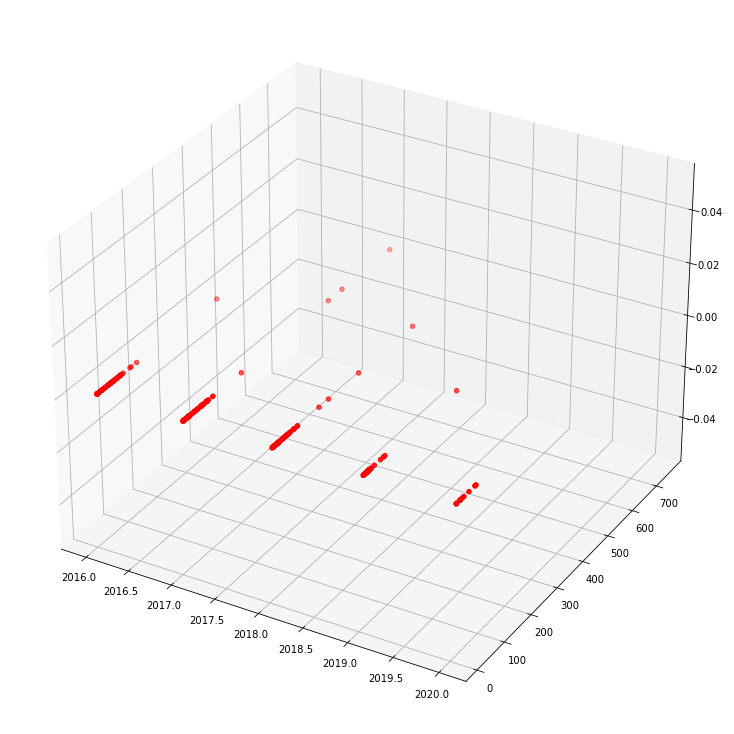

,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,year,WQI_def
0,2.7,8.30,211.0,0.40,0.800,10,138,7.6,1.3,11.0,2016.0,93.74
1,2.6,7.48,376.0,0.20,0.400,14,110,7.7,1.4,14.0,2016.0,53.61
2,2.4,7.69,411.0,0.30,0.700,28,134,7.3,1.0,12.0,2016.0,81.80
3,2.0,7.34,582.0,0.16,0.040,16,106,7.9,1.5,12.0,2016.0,17.81
4,1.3,7.28,368.0,0.40,0.500,8,138,7.4,1.5,9.0,2016.0,61.10
...,...,...,...,...,...,...,...,...,...,...,...,...
331,3.0,8.34,390.0,0.34,0.112,12,164,7.2,1.5,32.0,2019.0,30.60
332,4.0,8.12,302.0,0.80,0.130,38,144,7.5,1.5,16.0,2019.0,33.01
333,2.0,7.60,238.0,0.35,0.012,25,90,7.6,1.4,12.0,2019.0,16.00
334,2.0,8.19,273.0,1.30,0.112,32,76,7.7,1.6,12.0,2020.0,28.83


In [63]:
#visualizing the filttered data

year=final_df['year'].values
AQI=final_df['WQI_def'].values
final_df['WQI_def']=pd.to_numeric(final_df['WQI_def'],errors='coerce')
final_df['year']=pd.to_numeric(final_df['year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
final_df

In [64]:
#final_df = final_df[np.isfinite(final_df['wqi'])]
#final_df

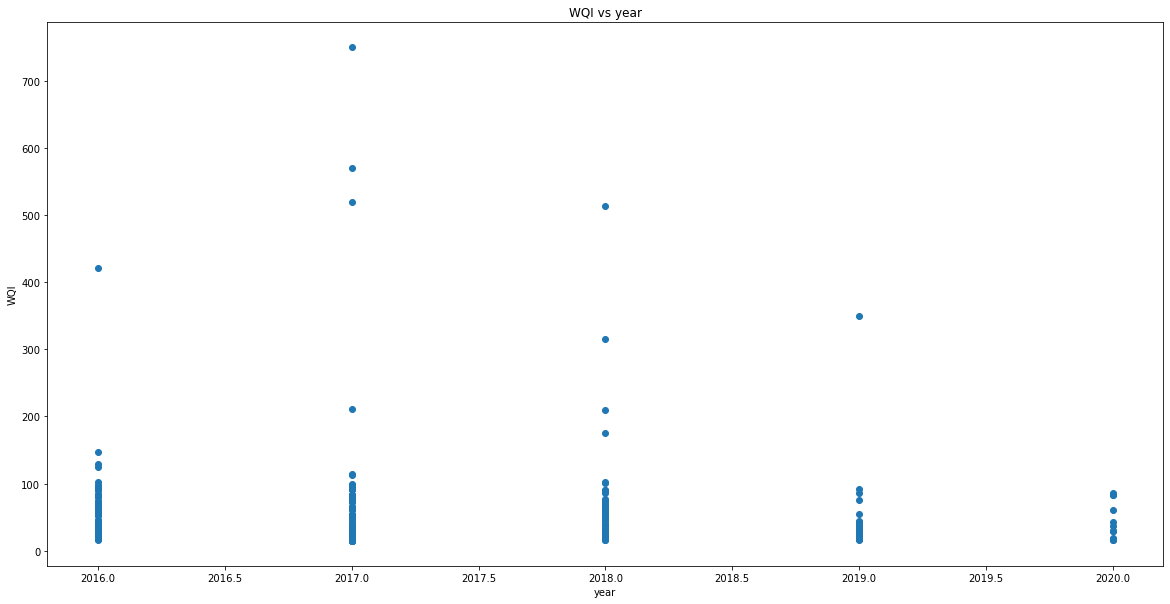

In [65]:
#scatter plot of data points
cols =['year']
y = final_df['WQI_def']
x=final_df[cols]

plt.scatter(x,y)
plt.xlabel('year')
plt.ylabel('WQI')
plt.title('WQI vs year')
plt.show()

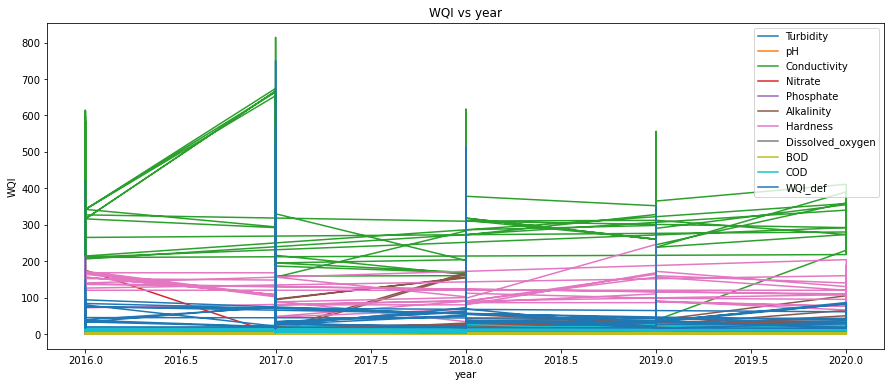

In [66]:
import matplotlib.pyplot as plt
final_df=final_df.set_index('year')
final_df.plot(figsize=(15,6))
plt.xlabel('year')
plt.ylabel('WQI')
plt.title('WQI vs year')
plt.show()

In [67]:
from sklearn import neighbors,datasets
final_df=final_df.reset_index(level=0,inplace=False)
final_df

,year,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,WQI_def
0,2016.0,2.7,8.30,211.0,0.40,0.800,10,138,7.6,1.3,11.0,93.74
1,2016.0,2.6,7.48,376.0,0.20,0.400,14,110,7.7,1.4,14.0,53.61
2,2016.0,2.4,7.69,411.0,0.30,0.700,28,134,7.3,1.0,12.0,81.80
3,2016.0,2.0,7.34,582.0,0.16,0.040,16,106,7.9,1.5,12.0,17.81
4,2016.0,1.3,7.28,368.0,0.40,0.500,8,138,7.4,1.5,9.0,61.10
...,...,...,...,...,...,...,...,...,...,...,...,...
331,2019.0,3.0,8.34,390.0,0.34,0.112,12,164,7.2,1.5,32.0,30.60
332,2019.0,4.0,8.12,302.0,0.80,0.130,38,144,7.5,1.5,16.0,33.01
333,2019.0,2.0,7.60,238.0,0.35,0.012,25,90,7.6,1.4,12.0,16.00
334,2020.0,2.0,8.19,273.0,1.30,0.112,32,76,7.7,1.6,12.0,28.83


In [68]:
#using linear regression to predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split

In [69]:
cols =['year']


In [70]:
y = final_df['WQI_def']
x=final_df[cols]

## Linear Regression

In [71]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

In [72]:
reg.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [73]:
x_train

,year
48,2016.0
300,2017.0
253,2017.0
256,2017.0
116,2017.0
...,...
306,2017.0
87,2019.0
197,2016.0
174,2018.0


In [74]:
y_train

48     83.77
300    19.59
253    16.43
256    26.39
116    72.65
       ...  
306    41.41
87     32.88
197    72.63
174    67.85
122    90.43
Name: WQI_def, Length: 201, dtype: float64

In [75]:
a=reg.predict(x_test)
a

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [76]:
y_test

318    100.26
130     22.03
172     16.27
14      92.48
213     25.79
        ...  
169     24.07
266     18.46
292     33.43
19      52.80
117     24.98
Name: WQI_def, Length: 135, dtype: float64

In [77]:
reg.score(x_test,y_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [78]:
reg.predict([[2022]])

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [79]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a}) 
dt

NameError: name 'a' is not defined

In [80]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

NameError: name 'a' is not defined

In [81]:
#using gradient descent to optimize it further
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.41210751],
       [ 1.        , -1.41210751],
       [ 1.        , -1.41210751],
       [ 1.        , -1.41210751],
       [ 1.        , -1.41210751],
       [ 1.        , -1.41210751],
       [ 1.        , -1.41210751],
       [ 1.        , -1.41210751],
       [ 1.        , -1.41210751],
       [ 1.        , -1.41210751],
       [ 1.        , -0.564843  ],
       [ 1.        , -0.564843  ],
       [ 1.        , -0.564843  ],
       [ 1.        , -0.564843  ],
       [ 1.        , -0.564843  ],
       [ 1.        , -0.564843  ],
       [ 1.        , -0.564843  ],
       [ 1.        , -0.564843  ],
       [ 1.        , -0.564843  ],
       [ 1.        , -0.564843  ],
       [ 1.        , -0.564843  ],
       [ 1.        , -0.564843  ],
       [ 1.        ,  0.2824215 ],
       [ 1.        ,  0.2824215 ],
       [ 1.        ,  0.2824215 ],
       [ 1.        ,  0.2824215 ],
       [ 1.        ,  0.2824215 ],
       [ 1.        ,  0.2824215 ],
       [ 1.        ,

In [82]:
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: nan, nan


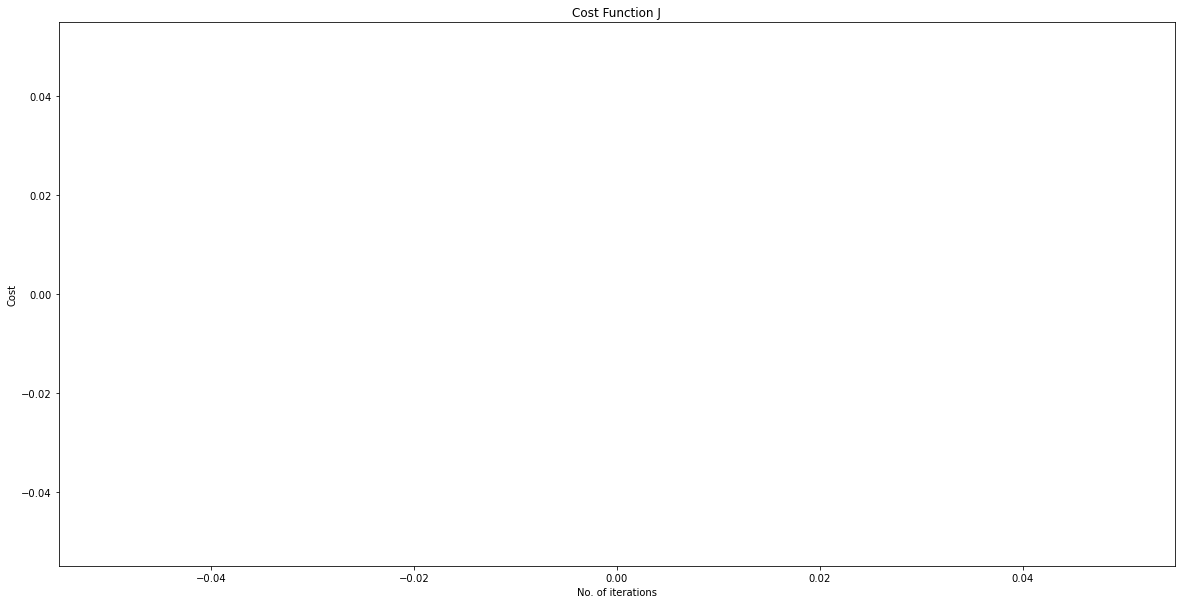

In [83]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [84]:
#prediction of january(2013-2015) across india
import numpy as np
newB=[54.15, -12.40]
# newB=[74.76, 2.13]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([final_df, dt], axis=1)
dt

,year,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,WQI_def,Actual,Predicted
0,2016.0,2.7,8.30,211.0,0.40,0.800,10,138,7.6,1.3,11.0,93.74,93.74,71.660133
1,2016.0,2.6,7.48,376.0,0.20,0.400,14,110,7.7,1.4,14.0,53.61,53.61,71.660133
2,2016.0,2.4,7.69,411.0,0.30,0.700,28,134,7.3,1.0,12.0,81.80,81.80,71.660133
3,2016.0,2.0,7.34,582.0,0.16,0.040,16,106,7.9,1.5,12.0,17.81,17.81,71.660133
4,2016.0,1.3,7.28,368.0,0.40,0.500,8,138,7.4,1.5,9.0,61.10,61.10,71.660133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2019.0,3.0,8.34,390.0,0.34,0.112,12,164,7.2,1.5,32.0,30.60,30.60,40.141894
332,2019.0,4.0,8.12,302.0,0.80,0.130,38,144,7.5,1.5,16.0,33.01,33.01,40.141894
333,2019.0,2.0,7.60,238.0,0.35,0.012,25,90,7.6,1.4,12.0,16.00,16.00,40.141894
334,2020.0,2.0,8.19,273.0,1.30,0.112,32,76,7.7,1.6,12.0,28.83,28.83,29.635814


In [85]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))
   

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#plotting the actual and predicted results
x_axis=dt.year
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()


In [89]:
final_df.head()

,year,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,WQI_def
0,2016.0,2.7,8.30,211.0,0.40,0.80,10,138,7.6,1.3,11.0,93.74
1,2016.0,2.6,7.48,376.0,0.20,0.40,14,110,7.7,1.4,14.0,53.61
2,2016.0,2.4,7.69,411.0,0.30,0.70,28,134,7.3,1.0,12.0,81.80
3,2016.0,2.0,7.34,582.0,0.16,0.04,16,106,7.9,1.5,12.0,17.81
4,2016.0,1.3,7.28,368.0,0.40,0.50,8,138,7.4,1.5,9.0,61.10


In [90]:
final_df = final_df.drop('year', axis=1)

In [91]:
final_df.shape

(336, 11)

In [92]:
final_df.isna().sum()

Turbidity            4
pH                   3
Conductivity         0
Nitrate              3
Phosphate            4
Alkalinity           0
Hardness             0
Dissolved_oxygen     0
BOD                  1
COD                  0
WQI_def             14
dtype: int64

In [93]:
final_df = final_df.dropna()

## Correlation Matrics

In [103]:
final_df.corr()

,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,WQI_def
Turbidity,1.000000,-0.016915,-0.034873,-0.010353,0.036705,0.014098,-0.135841,0.813175,0.032559,0.075420,0.311148
pH,-0.016915,1.000000,-0.183018,0.059373,0.018866,-0.027340,0.021395,-0.042743,0.049061,0.221470,0.054839
Conductivity,-0.034873,-0.183018,1.000000,-0.027689,0.017959,-0.018621,0.263944,-0.011555,0.105148,0.087783,-0.006749
Nitrate,-0.010353,0.059373,-0.027689,1.000000,0.049269,-0.052267,0.014452,-0.012548,-0.013332,-0.061011,0.473404
Phosphate,0.036705,0.018866,0.017959,0.049269,1.000000,-0.030182,0.041208,-0.006660,-0.048873,-0.094791,0.854900
Alkalinity,0.014098,-0.027340,-0.018621,-0.052267,-0.030182,1.000000,-0.153297,-0.056631,-0.074443,-0.095952,-0.044870
Hardness,-0.135841,0.021395,0.263944,0.014452,0.041208,-0.153297,1.000000,-0.173914,0.124287,0.298763,0.007935
Dissolved_oxygen,0.813175,-0.042743,-0.011555,-0.012548,-0.006660,-0.056631,-0.173914,1.000000,-0.022808,-0.052950,0.214058
BOD,0.032559,0.049061,0.105148,-0.013332,-0.048873,-0.074443,0.124287,-0.022808,1.000000,0.310495,-0.006163
COD,0.075420,0.221470,0.087783,-0.061011,-0.094791,-0.095952,0.298763,-0.052950,0.310495,1.000000,-0.063970


## Heatmap 

<AxesSubplot:>

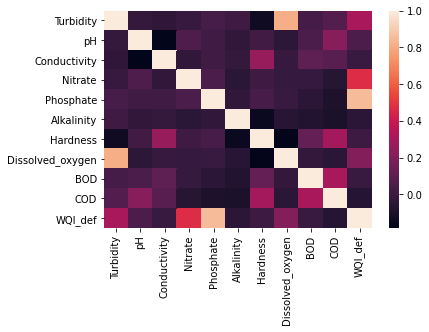

In [106]:
import seaborn as sns
%matplotlib inline
sns.heatmap(final_df.corr())

<AxesSubplot:>

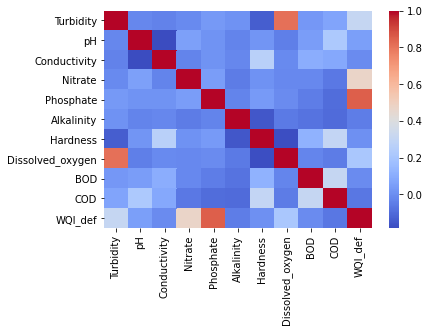

In [107]:
sns.heatmap(final_df.corr(), cmap='coolwarm')

<AxesSubplot:>

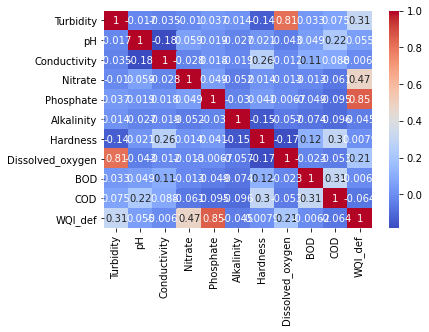

In [108]:
sns.heatmap(final_df.corr(), cmap='coolwarm', annot = True)

# Linear Regression With ALL Parameters

In [94]:
# scaling
X = final_df.drop('WQI_def', axis=1).values
y = final_df['WQI_def'].values

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
sc = StandardScaler()

In [98]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

[[ 41.40720135  41.41      ]
 [ 63.26416089  63.26      ]
 [ 31.46832295  31.47      ]
 [ 36.84707175  36.85      ]
 [ 17.8163064   17.81      ]
 [ 92.39462268  92.39      ]
 [ 16.39191053  16.39      ]
 [102.53416093 102.53      ]
 [ 35.14795984  35.15      ]
 [ 29.31476623  29.31      ]
 [ 45.0516781   45.05      ]
 [ 35.53346897  35.53      ]
 [ 91.01206752  91.01      ]
 [ 43.54028363  43.54      ]
 [ 35.72859557  35.73      ]
 [ 29.97954483  29.98      ]
 [ 74.6034009   74.61      ]
 [ 29.19015079  29.19      ]
 [ 90.27714471  90.28      ]
 [ 74.96607318  74.97      ]
 [ 90.94472522  90.94      ]
 [ 32.71668467  32.71      ]
 [ 24.0748963   24.07      ]
 [ 72.62499819  72.63      ]
 [ 86.02246803  86.02      ]
 [ 33.15518745  33.15      ]
 [ 28.24303013  28.24      ]
 [ 46.75836078  46.76      ]
 [ 72.15304466  72.15      ]
 [ 17.60467624  17.61      ]
 [ 20.26532217  20.26      ]
 [ 25.32005422  25.32      ]
 [ 17.09521251  17.09      ]
 [ 19.33884023  19.34      ]
 [ 30.54203864

Text(0, 0.5, 'Predicted pull')

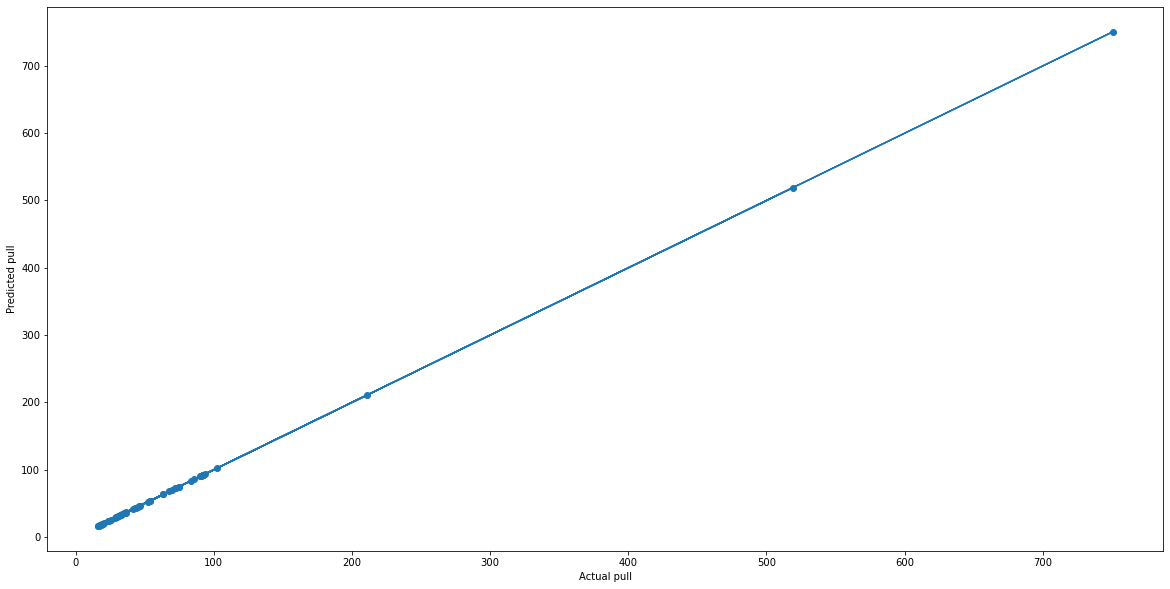

In [100]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(np.concatenate((lr_pred.reshape(len(lr_pred),1),y_test.reshape(len(y_test),1)), axis=1))

print('MAE:', mean_absolute_error(y_test, lr_pred))
print('MSE:', mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2:', r2_score(y_test, lr_pred))

plt.scatter(lr_pred, y_test)
plt.plot(y_test, y_test)
plt.xlabel('Actual pull')
plt.ylabel('Predicted pull')

## SVM Model

[[ 41.37989697  41.41      ]
 [ 63.5374149   63.26      ]
 [ 31.55357123  31.47      ]
 [ 36.95988434  36.85      ]
 [ 18.06003012  17.81      ]
 [ 92.23325617  92.39      ]
 [ 16.61900432  16.39      ]
 [102.23908297 102.53      ]
 [ 35.18398105  35.15      ]
 [ 29.41500363  29.31      ]
 [ 45.01840897  45.05      ]
 [ 35.26391498  35.53      ]
 [ 90.87844521  91.01      ]
 [ 43.29948183  43.54      ]
 [ 35.55524106  35.73      ]
 [ 30.5236068   29.98      ]
 [ 74.36080161  74.61      ]
 [ 29.08916241  29.19      ]
 [ 90.37341363  90.28      ]
 [ 73.92343181  74.97      ]
 [ 89.86857983  90.94      ]
 [ 32.77550413  32.71      ]
 [ 24.20839337  24.07      ]
 [ 72.44990183  72.63      ]
 [ 86.28545129  86.02      ]
 [ 32.69115547  33.15      ]
 [ 28.10701799  28.24      ]
 [ 46.74117032  46.76      ]
 [ 72.2706812   72.15      ]
 [ 17.79667142  17.61      ]
 [ 20.18464866  20.26      ]
 [ 25.00945201  25.32      ]
 [ 17.22522136  17.09      ]
 [ 19.67060385  19.34      ]
 [ 30.27771352

Text(0, 0.5, 'Predicted pull')

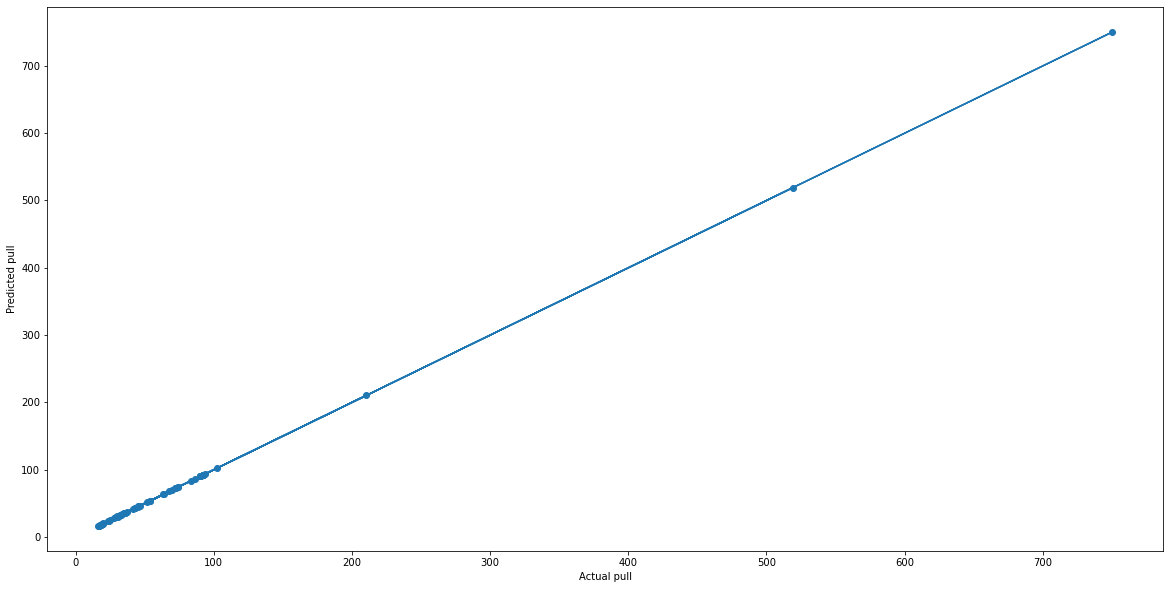

In [101]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
print(np.concatenate((svr_pred.reshape(len(svr_pred),1),y_test.reshape(len(y_test),1)), axis=1))

print('MAE:', mean_absolute_error(y_test, svr_pred))
print('MSE:', mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, svr_pred)))
print('R2:', r2_score(y_test, svr_pred))

plt.scatter(svr_pred, y_test)
plt.plot(y_test, y_test)
plt.xlabel('Actual pull')
plt.ylabel('Predicted pull')

In [102]:
final_df.head()

,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,WQI_def
0,2.7,8.30,211.0,0.40,0.80,10,138,7.6,1.3,11.0,93.74
1,2.6,7.48,376.0,0.20,0.40,14,110,7.7,1.4,14.0,53.61
2,2.4,7.69,411.0,0.30,0.70,28,134,7.3,1.0,12.0,81.80
3,2.0,7.34,582.0,0.16,0.04,16,106,7.9,1.5,12.0,17.81
4,1.3,7.28,368.0,0.40,0.50,8,138,7.4,1.5,9.0,61.10


## LR- With 5 Parameter- (Turbidity, pH, Phasphate, Hardness, DO)

In [64]:
# scaling
X = final_df.drop(['WQI_def', 'Conductivity', 'Alkalinity', 'BOD','COD','Nitrate'],axis='columns')
#X = final_df.drop('WQI_def', 'Conductivity', 'Dissolved_oxygen', 'Alkalinity', 'BOD','COD',axis='columns')
#X = final_df.drop['WQI_def', 'Conductivity', 'Dissolved_oxygen', 'Alkalinity', 'BOD','COD'].values
y = final_df['WQI_def'].values

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc = StandardScaler()

In [68]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

[[ 41.91650427  41.41      ]
 [ 67.28693584  63.26      ]
 [ 36.51469229  31.47      ]
 [ 39.16403278  36.85      ]
 [ 17.87472643  17.81      ]
 [100.55833159  92.39      ]
 [ 16.47211232  16.39      ]
 [111.65008518 102.53      ]
 [ 39.46105675  35.15      ]
 [ 33.44513151  29.31      ]
 [ 50.57519395  45.05      ]
 [ 35.71287278  35.53      ]
 [ 98.4932275   91.01      ]
 [ 44.26272578  43.54      ]
 [ 37.47254954  35.73      ]
 [ 34.15651105  29.98      ]
 [ 79.22293455  74.61      ]
 [ 29.62779833  29.19      ]
 [ 95.96930307  90.28      ]
 [ 75.64234887  74.97      ]
 [ 89.4894334   90.94      ]
 [ 35.94848624  32.71      ]
 [ 29.30975274  24.07      ]
 [ 76.05122436  72.63      ]
 [ 93.52713558  86.02      ]
 [ 32.73215114  33.15      ]
 [ 31.21629346  28.24      ]
 [ 49.71589898  46.76      ]
 [ 81.67221928  72.15      ]
 [ 16.78087795  17.61      ]
 [ 19.07027204  20.26      ]
 [ 22.91277464  25.32      ]
 [ 19.75767628  17.09      ]
 [ 21.98266679  19.34      ]
 [ 32.36211807

Text(0, 0.5, 'Predicted pull')

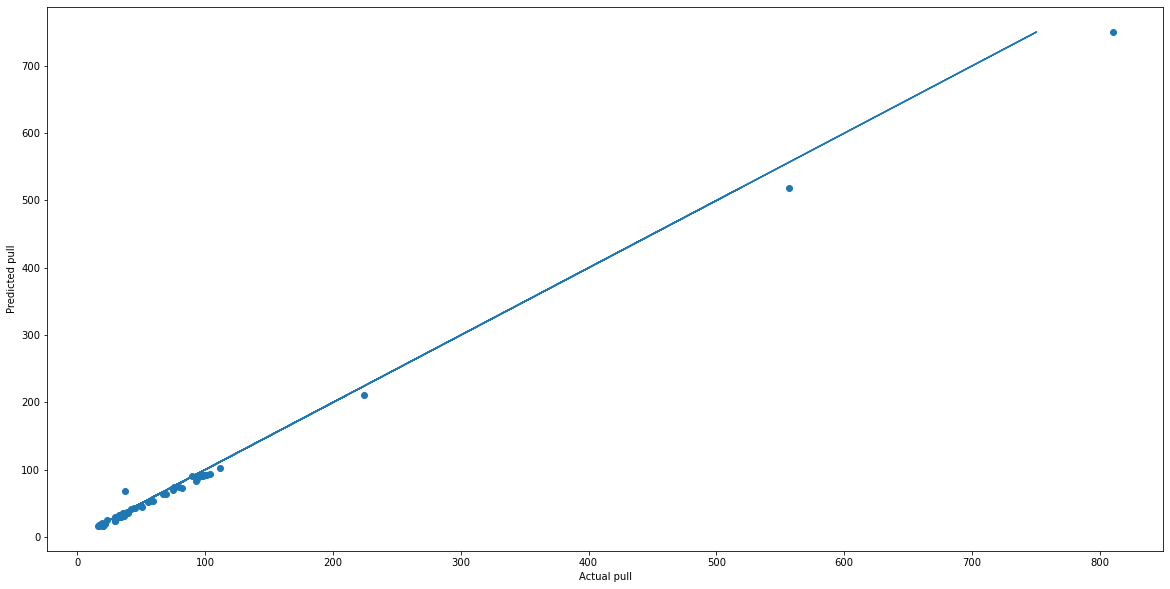

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(np.concatenate((lr_pred.reshape(len(lr_pred),1),y_test.reshape(len(y_test),1)), axis=1))

print('MAE:', mean_absolute_error(y_test, lr_pred))
print('MSE:', mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2:', r2_score(y_test, lr_pred))

plt.scatter(lr_pred, y_test)
plt.plot(y_test, y_test)
plt.xlabel('Actual pull')
plt.ylabel('Predicted pull')

[[ 43.71913283  41.41      ]
 [ 70.46121684  63.26      ]
 [ 29.43298888  31.47      ]
 [ 30.87217653  36.85      ]
 [ 23.49359968  17.81      ]
 [ 83.0235219   92.39      ]
 [ 22.7017134   16.39      ]
 [100.8199627  102.53      ]
 [ 31.11654849  35.15      ]
 [ 29.06882662  29.31      ]
 [ 37.47223104  45.05      ]
 [ 39.57124617  35.53      ]
 [ 92.2367147   91.01      ]
 [ 36.93792561  43.54      ]
 [ 31.23535262  35.73      ]
 [ 39.72367606  29.98      ]
 [ 74.99724654  74.61      ]
 [ 25.74934383  29.19      ]
 [ 91.14844977  90.28      ]
 [ 75.98829022  74.97      ]
 [ 42.77291543  90.94      ]
 [ 29.06882662  32.71      ]
 [ 29.89213706  24.07      ]
 [ 74.17308409  72.63      ]
 [ 87.74186955  86.02      ]
 [ 37.52945019  33.15      ]
 [ 28.68691062  28.24      ]
 [ 42.29120796  46.76      ]
 [ 73.34892163  72.15      ]
 [ 22.37081348  17.61      ]
 [ 23.62862585  20.26      ]
 [ 24.65404244  25.32      ]
 [ 23.66356824  17.09      ]
 [ 24.23518331  19.34      ]
 [ 35.43380936

Text(0, 0.5, 'Predicted pull')

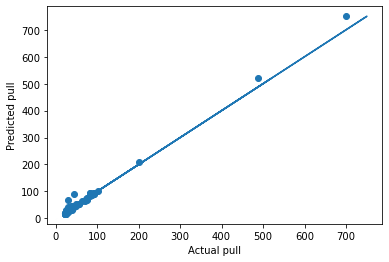

In [109]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
print(np.concatenate((svr_pred.reshape(len(svr_pred),1),y_test.reshape(len(y_test),1)), axis=1))

print('MAE:', mean_absolute_error(y_test, svr_pred))
print('MSE:', mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, svr_pred)))
print('R2:', r2_score(y_test, svr_pred))

plt.scatter(svr_pred, y_test)
plt.plot(y_test, y_test)
plt.xlabel('Actual pull')
plt.ylabel('Predicted pull')

In [71]:
final_df.head()

,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,WQI_def
year,,,,,,,,,,,
2016.0,2.7,8.30,211.0,0.40,0.80,10,138,7.6,1.3,11.0,93.74
2016.0,2.6,7.48,376.0,0.20,0.40,14,110,7.7,1.4,14.0,53.61
2016.0,2.4,7.69,411.0,0.30,0.70,28,134,7.3,1.0,12.0,81.80
2016.0,2.0,7.34,582.0,0.16,0.04,16,106,7.9,1.5,12.0,17.81
2016.0,1.3,7.28,368.0,0.40,0.50,8,138,7.4,1.5,9.0,61.10


## -LR With 3 parameters (Nitrate, Phosphate, DO)-

[[ 39.24599992  41.41      ]
 [ 93.19099807  63.26      ]
 [ 28.946493    31.47      ]
 [ 28.25770967  36.85      ]
 [ 26.79930805  17.81      ]
 [ 92.56864796  92.39      ]
 [ 24.76916831  16.39      ]
 [109.24449264 102.53      ]
 [ 29.71563629  35.15      ]
 [ 27.3847535   29.31      ]
 [ 39.17426836  45.05      ]
 [ 48.86111304  35.53      ]
 [104.06938373  91.01      ]
 [ 31.74719101  43.54      ]
 [ 32.34847828  35.73      ]
 [ 69.1010312   29.98      ]
 [ 86.18076349  74.61      ]
 [ 28.50032404  29.19      ]
 [ 99.11720013  90.28      ]
 [ 85.67492585  74.97      ]
 [ 49.07000717  90.94      ]
 [ 27.3847535   32.71      ]
 [ 31.81414593  24.07      ]
 [ 82.71864005  72.63      ]
 [ 97.51464646  86.02      ]
 [ 44.32872717  33.15      ]
 [ 27.21915801  28.24      ]
 [ 45.70921213  46.76      ]
 [ 79.25651661  72.15      ]
 [ 22.1103834   17.61      ]
 [ 23.83940401  20.26      ]
 [ 23.99308224  25.32      ]
 [ 26.0161858   17.09      ]
 [ 25.43079258  19.34      ]
 [ 41.82852216

Text(0, 0.5, 'Predicted pull')

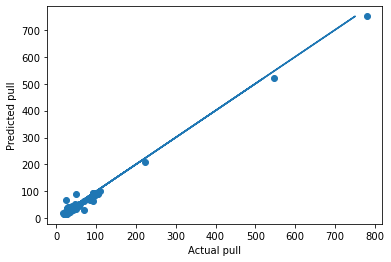

In [111]:
# scaling
X = final_df.drop(['WQI_def', 'Conductivity', 'Alkalinity', 'BOD','COD','pH','Turbidity','Hardness'],axis='columns')
#X = final_df.drop('WQI_def', 'Conductivity', 'Dissolved_oxygen', 'Alkalinity', 'BOD','COD',axis='columns')
#X = final_df.drop['WQI_def', 'Conductivity', 'Dissolved_oxygen', 'Alkalinity', 'BOD','COD'].values
y = final_df['WQI_def'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

##--- Linear Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(np.concatenate((lr_pred.reshape(len(lr_pred),1),y_test.reshape(len(y_test),1)), axis=1))

print('MAE:', mean_absolute_error(y_test, lr_pred))
print('MSE:', mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2:', r2_score(y_test, lr_pred))

plt.scatter(lr_pred, y_test)
plt.plot(y_test, y_test)
plt.xlabel('Actual pull')
plt.ylabel('Predicted pull')



[[ 43.71913283  41.41      ]
 [ 70.46121684  63.26      ]
 [ 29.43298888  31.47      ]
 [ 30.87217653  36.85      ]
 [ 23.49359968  17.81      ]
 [ 83.0235219   92.39      ]
 [ 22.7017134   16.39      ]
 [100.8199627  102.53      ]
 [ 31.11654849  35.15      ]
 [ 29.06882662  29.31      ]
 [ 37.47223104  45.05      ]
 [ 39.57124617  35.53      ]
 [ 92.2367147   91.01      ]
 [ 36.93792561  43.54      ]
 [ 31.23535262  35.73      ]
 [ 39.72367606  29.98      ]
 [ 74.99724654  74.61      ]
 [ 25.74934383  29.19      ]
 [ 91.14844977  90.28      ]
 [ 75.98829022  74.97      ]
 [ 42.77291543  90.94      ]
 [ 29.06882662  32.71      ]
 [ 29.89213706  24.07      ]
 [ 74.17308409  72.63      ]
 [ 87.74186955  86.02      ]
 [ 37.52945019  33.15      ]
 [ 28.68691062  28.24      ]
 [ 42.29120796  46.76      ]
 [ 73.34892163  72.15      ]
 [ 22.37081348  17.61      ]
 [ 23.62862585  20.26      ]
 [ 24.65404244  25.32      ]
 [ 23.66356824  17.09      ]
 [ 24.23518331  19.34      ]
 [ 35.43380936

Text(0, 0.5, 'Predicted pull')

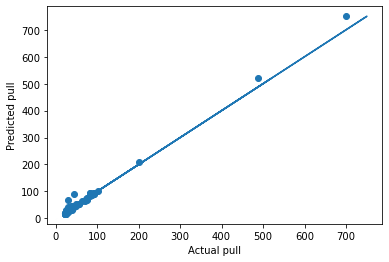

In [112]:
##--- SVM MODel

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
print(np.concatenate((svr_pred.reshape(len(svr_pred),1),y_test.reshape(len(y_test),1)), axis=1))

print('MAE:', mean_absolute_error(y_test, svr_pred))
print('MSE:', mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, svr_pred)))
print('R2:', r2_score(y_test, svr_pred))

plt.scatter(svr_pred, y_test)
plt.plot(y_test, y_test)
plt.xlabel('Actual pull')
plt.ylabel('Predicted pull')

##  - Linear Regression With 3 Parameters (Turbidity, pH, DO)-


In [73]:
# scaling
X = final_df.drop(['WQI_def', 'Conductivity', 'Alkalinity', 'BOD','COD','Nitrate','Phosphate','Hardness'],axis='columns')
#X = final_df.drop('WQI_def', 'Conductivity', 'Dissolved_oxygen', 'Alkalinity', 'BOD','COD',axis='columns')
#X = final_df.drop['WQI_def', 'Conductivity', 'Dissolved_oxygen', 'Alkalinity', 'BOD','COD'].values
y = final_df['WQI_def'].values

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
sc = StandardScaler()

In [77]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


[[ 44.16772649  41.41      ]
 [ 28.2094447   63.26      ]
 [ 58.45253608  31.47      ]
 [ 59.28315182  36.85      ]
 [ 38.13065339  17.81      ]
 [ 62.11845121  92.39      ]
 [ 38.63663409  16.39      ]
 [ 45.89622058 102.53      ]
 [ 59.56632313  35.15      ]
 [ 54.2561552   29.31      ]
 [ 64.79749563  45.05      ]
 [ 35.90360386  35.53      ]
 [ 41.0108585   91.01      ]
 [ 59.05866327  43.54      ]
 [ 57.66390864  35.73      ]
 [ 26.16688836  29.98      ]
 [ 40.27975665  74.61      ]
 [ 53.07764739  29.19      ]
 [ 39.41347743  90.28      ]
 [ 37.96754899  74.97      ]
 [115.6771066   90.94      ]
 [ 58.38697957  32.71      ]
 [ 47.93455044  24.07      ]
 [ 38.77420429  72.63      ]
 [ 40.86525738  86.02      ]
 [ 38.94158644  33.15      ]
 [ 53.64834885  28.24      ]
 [ 55.73971312  46.76      ]
 [ 49.27970241  72.15      ]
 [ 40.35770292  17.61      ]
 [ 41.79717418  20.26      ]
 [ 47.00551647  25.32      ]
 [ 42.8299998   17.09      ]
 [ 39.95302327  19.34      ]
 [ 41.82554473

Text(0, 0.5, 'Predicted pull')

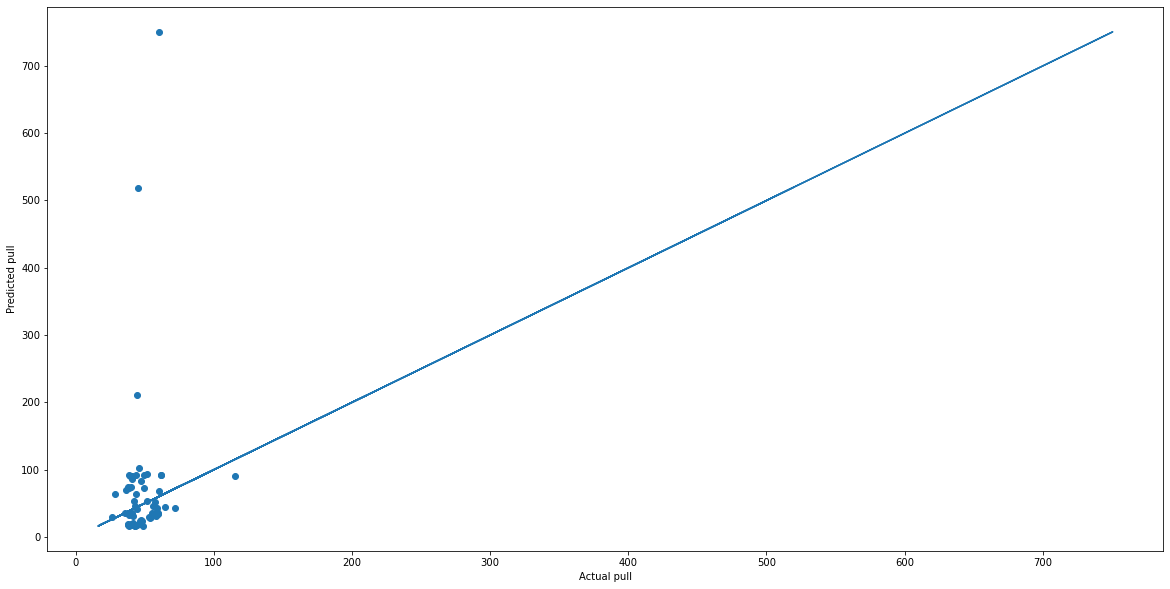

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(np.concatenate((lr_pred.reshape(len(lr_pred),1),y_test.reshape(len(y_test),1)), axis=1))

print('MAE:', mean_absolute_error(y_test, lr_pred))
print('MSE:', mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2:', r2_score(y_test, lr_pred))

plt.scatter(lr_pred, y_test)
plt.plot(y_test, y_test)
plt.xlabel('Actual pull')
plt.ylabel('Predicted pull')

[[ 43.71913283  41.41      ]
 [ 70.46121684  63.26      ]
 [ 29.43298888  31.47      ]
 [ 30.87217653  36.85      ]
 [ 23.49359968  17.81      ]
 [ 83.0235219   92.39      ]
 [ 22.7017134   16.39      ]
 [100.8199627  102.53      ]
 [ 31.11654849  35.15      ]
 [ 29.06882662  29.31      ]
 [ 37.47223104  45.05      ]
 [ 39.57124617  35.53      ]
 [ 92.2367147   91.01      ]
 [ 36.93792561  43.54      ]
 [ 31.23535262  35.73      ]
 [ 39.72367606  29.98      ]
 [ 74.99724654  74.61      ]
 [ 25.74934383  29.19      ]
 [ 91.14844977  90.28      ]
 [ 75.98829022  74.97      ]
 [ 42.77291543  90.94      ]
 [ 29.06882662  32.71      ]
 [ 29.89213706  24.07      ]
 [ 74.17308409  72.63      ]
 [ 87.74186955  86.02      ]
 [ 37.52945019  33.15      ]
 [ 28.68691062  28.24      ]
 [ 42.29120796  46.76      ]
 [ 73.34892163  72.15      ]
 [ 22.37081348  17.61      ]
 [ 23.62862585  20.26      ]
 [ 24.65404244  25.32      ]
 [ 23.66356824  17.09      ]
 [ 24.23518331  19.34      ]
 [ 35.43380936

Text(0, 0.5, 'Predicted pull')

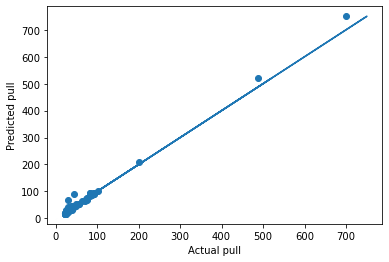

In [113]:
##--- SVM MODel

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
print(np.concatenate((svr_pred.reshape(len(svr_pred),1),y_test.reshape(len(y_test),1)), axis=1))

print('MAE:', mean_absolute_error(y_test, svr_pred))
print('MSE:', mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, svr_pred)))
print('R2:', r2_score(y_test, svr_pred))

plt.scatter(svr_pred, y_test)
plt.plot(y_test, y_test)
plt.xlabel('Actual pull')
plt.ylabel('Predicted pull')

In [ ]:
final_df.head()
# scaling
X = final_df.drop('WQI_def', axis=1).values
y = final_df['WQI_def'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(np.concatenate((lr_pred.reshape(len(lr_pred),1),y_test.reshape(len(y_test),1)), axis=1))

print('MAE:', mean_absolute_error(y_test, lr_pred))
print('MSE:', mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2:', r2_score(y_test, lr_pred))

plt.scatter(lr_pred, y_test)
plt.plot(y_test, y_test)
plt.xlabel('Actual pull')
plt.ylabel('Predicted pull')

In [ ]:
#from sklearn import datasets
#digits = datasets.load_digits()

In [114]:
final_df.head()

,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,WQI_def
0,2.7,8.30,211.0,0.40,0.80,10,138,7.6,1.3,11.0,93.74
1,2.6,7.48,376.0,0.20,0.40,14,110,7.7,1.4,14.0,53.61
2,2.4,7.69,411.0,0.30,0.70,28,134,7.3,1.0,12.0,81.80
3,2.0,7.34,582.0,0.16,0.04,16,106,7.9,1.5,12.0,17.81
4,1.3,7.28,368.0,0.40,0.50,8,138,7.4,1.5,9.0,61.10


In [115]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [116]:
X = final_df.drop('WQI_def', axis=1).values
y = final_df['WQI_def'].values

In [117]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [118]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

ValueError: Found input variables with inconsistent numbers of samples: [336, 322]